<a href="https://colab.research.google.com/github/rkarthiksub/MachineLearningNotebooks/blob/master/Unsuprevised_Learning_Countrydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# read csv files
data_dict_path='/content/data-dictionary.csv'
country_path='/content/Country-data.csv'
dict_df = pd.read_csv(data_dict_path)
df = pd.read_csv(country_path)

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()
print(50*'-')
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory

In [ ]:
df.isnull().sum()
print(df)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   

In [ ]:
#number of unique countries
df['country'].nunique()

167

In [ ]:
data=df.drop(['country'],axis=1)

<Axes: >

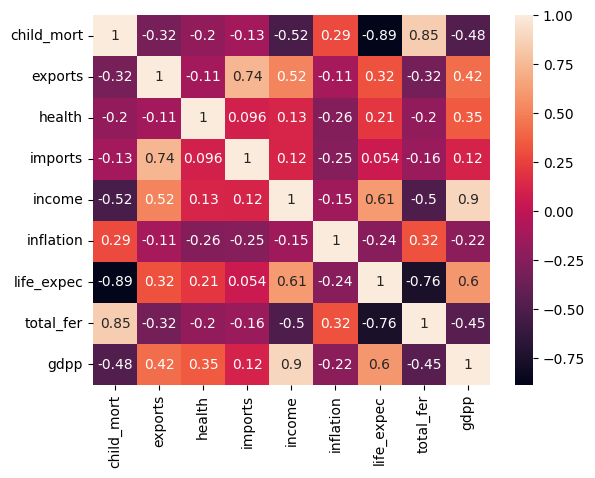

In [ ]:
#correlation
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

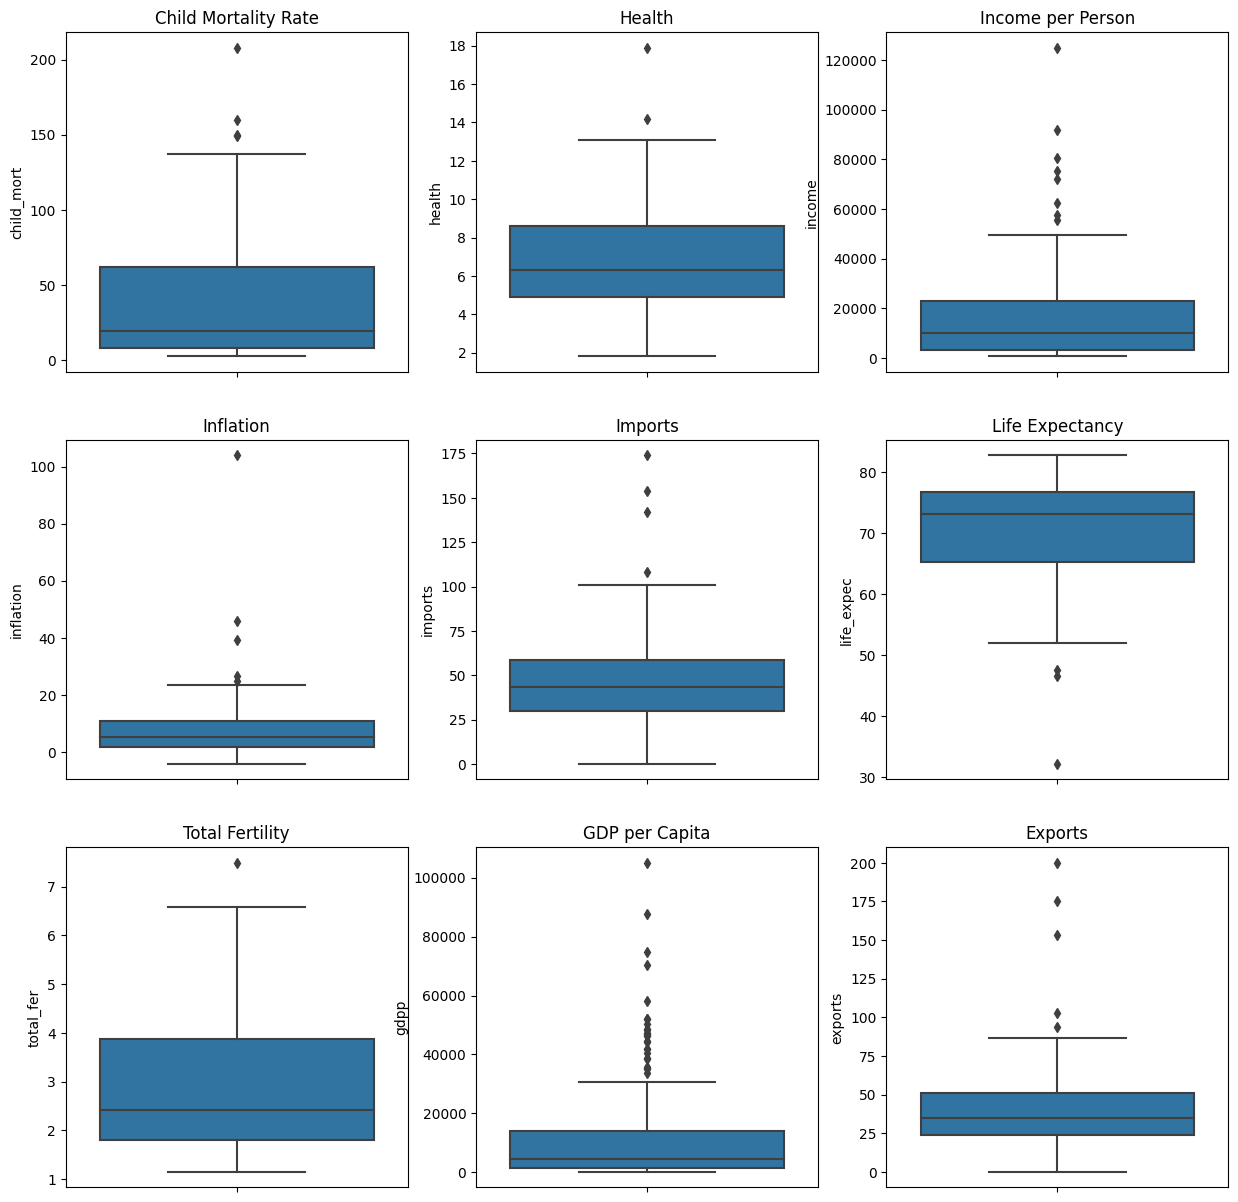

In [ ]:
#box plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()


From above box-plots we can see that their are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.Now we can remove the outliers but we are not going to do it as our dataset is very small (167 rows only)



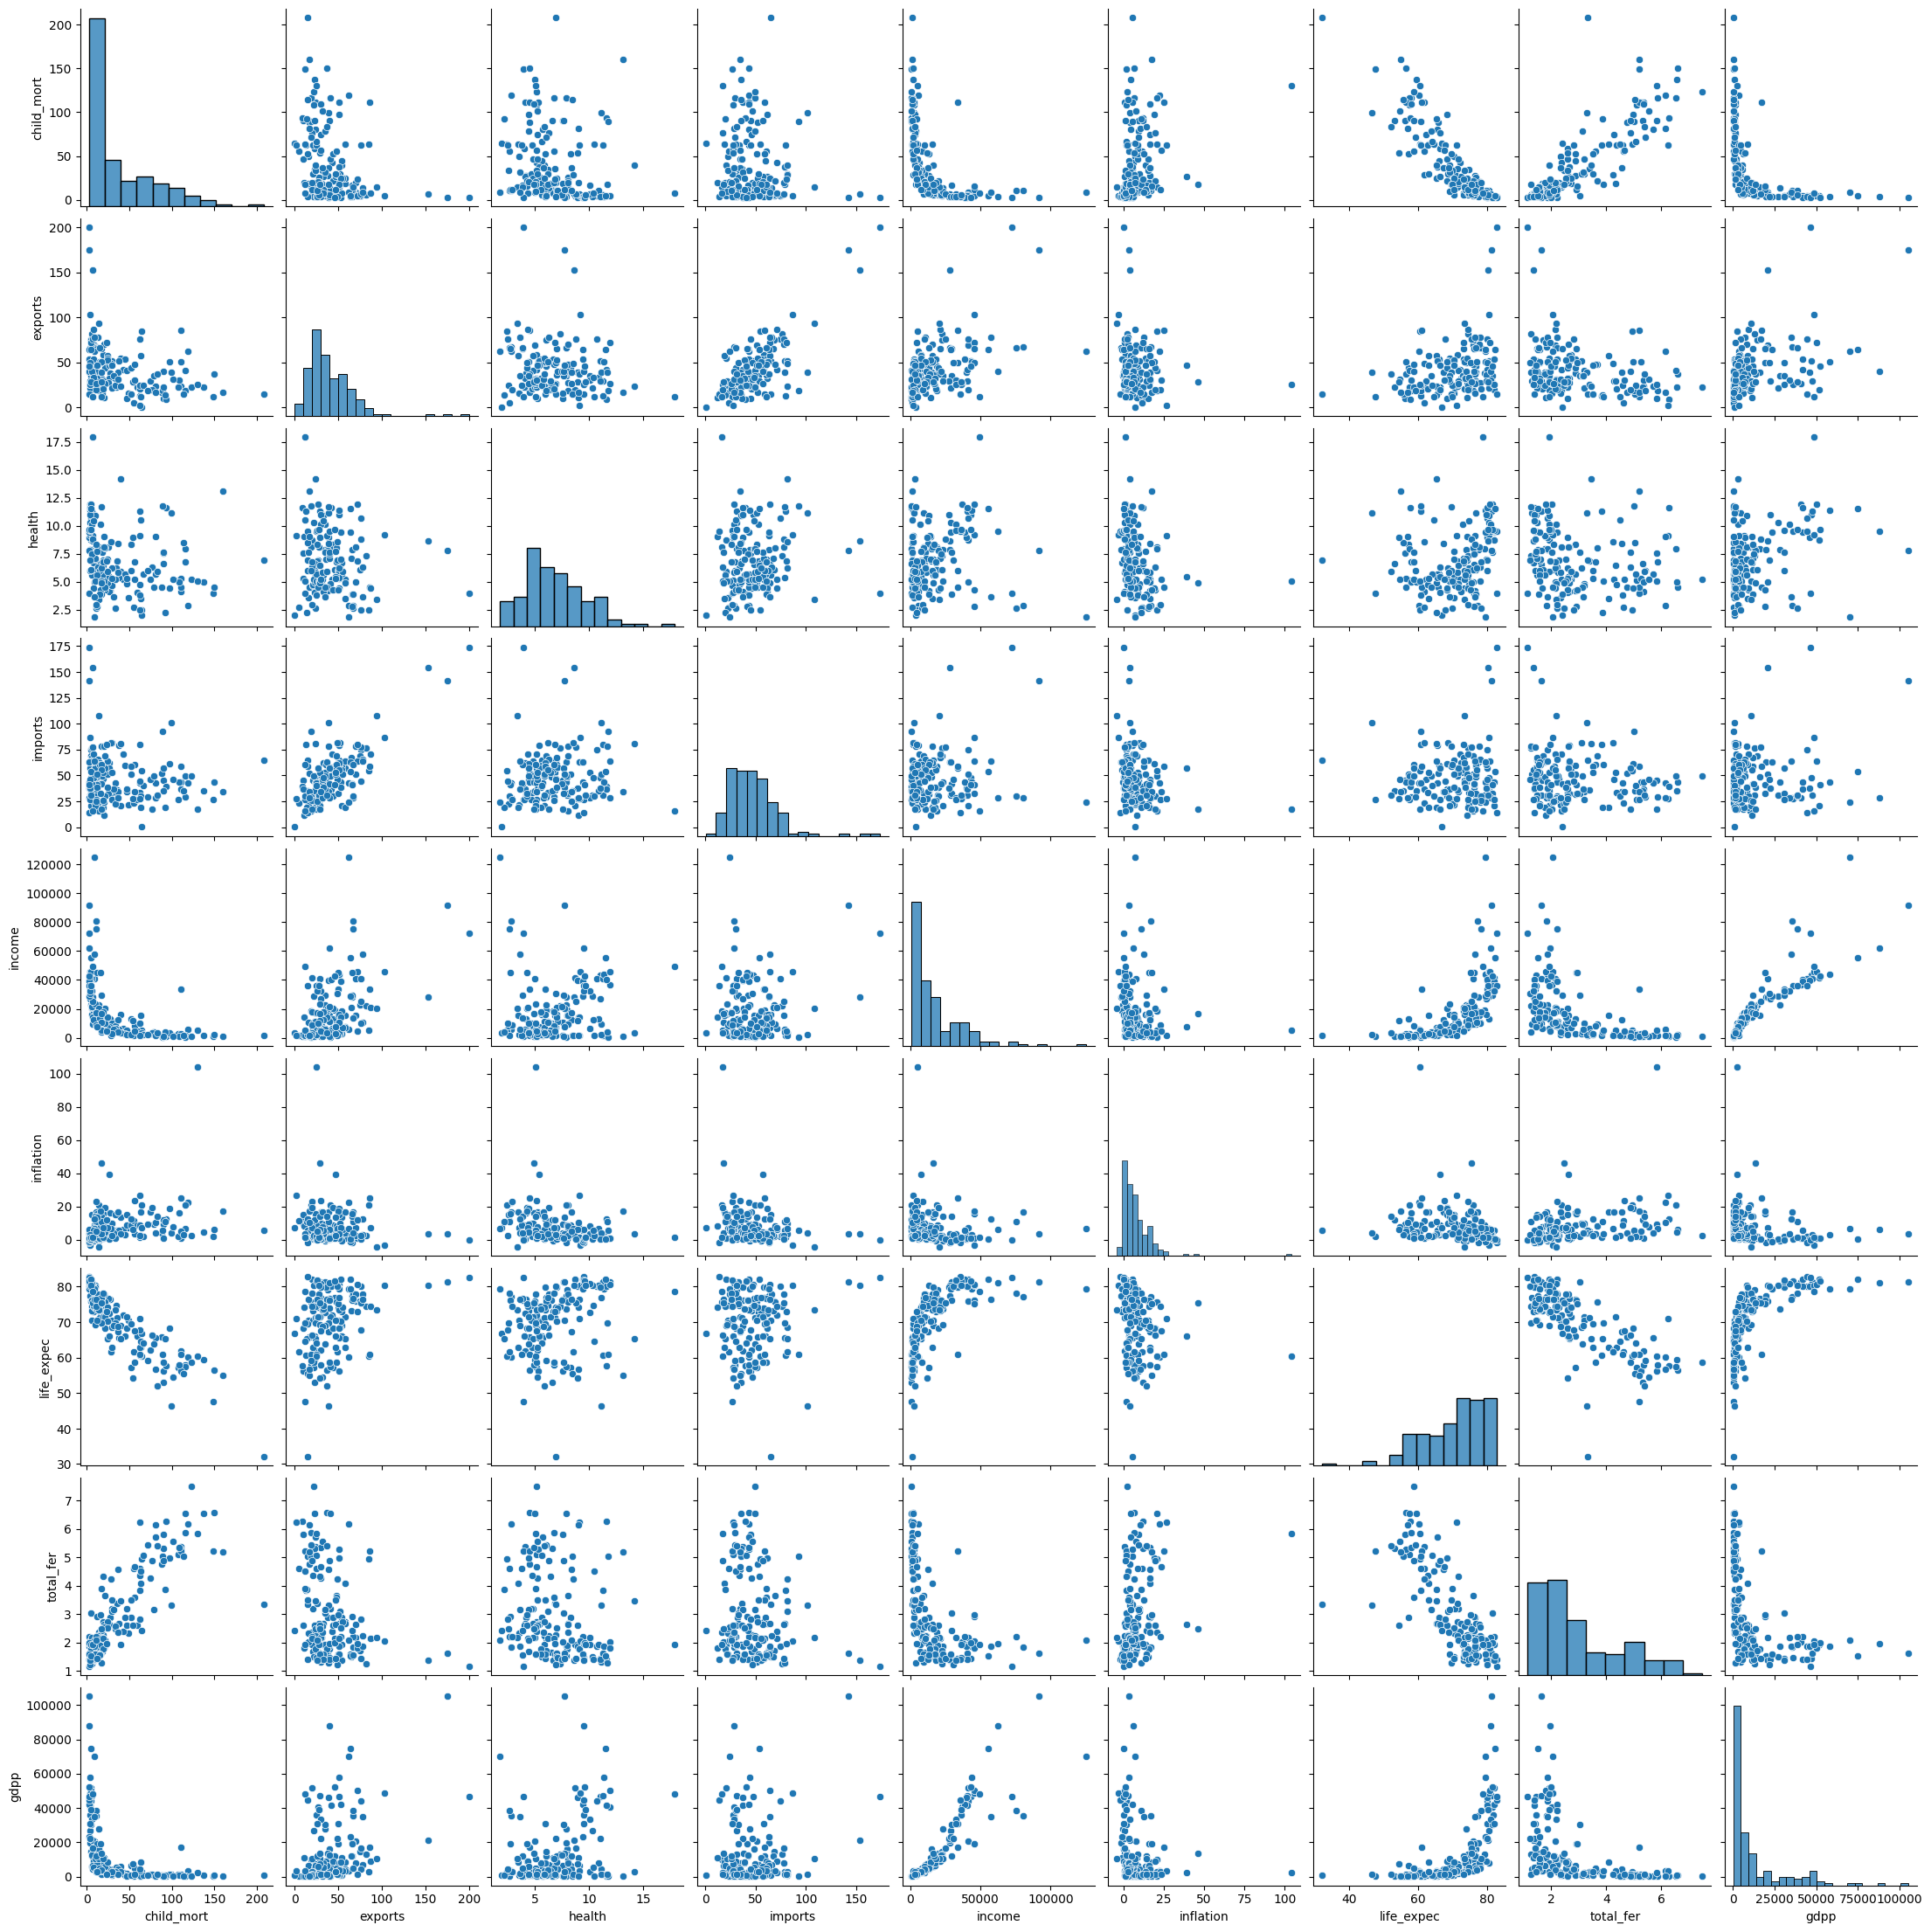

In [ ]:
sns.pairplot(df)




bold text

In [ ]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(data)


In [ ]:
scaled_df=pd.DataFrame(scaled,columns=data.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


from matplotlib import pyplot as plt
_df_0['child_mort'].plot(kind='hist', bins=20, title='child_mort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['exports'].plot(kind='hist', bins=20, title='exports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['health'].plot(kind='hist', bins=20, title='health')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['imports'].plot(kind='hist', bins=20, title='imports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='child_mort', y='exports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='exports', y='health', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='health', y='imports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='imports', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['child_mort'].plot(kind='line', figsize=(8, 4), title='child_mort')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['exports'].plot(kind='line', figsize=(8, 4), title='exports')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['health'].plot(kind='line', figsize=(8, 4), title='health')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['imports'].plot(kind='line', figsize=(8, 4), title='imports')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['child_mort'].plot(kind='hist', bins=20, title='child_mort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['exports'].plot(kind='hist', bins=20, title='exports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['health'].plot(kind='hist', bins=20, title='health')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='index', y='child_mort', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='child_mort', y='exports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='exports', y='health', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='health', y='imports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['child_mort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('child_mort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['exports']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('exports')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['health']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('health')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['imports']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('imports')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['child_mort'].plot(kind='line', figsize=(8, 4), title='child_mort')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['exports'].plot(kind='line', figsize=(8, 4), title='exports')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['health'].plot(kind='line', figsize=(8, 4), title='health')
plt.gca().spines[['top', 'right']].set_visible(False)

K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

First we initialize k points called means randomly
Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
We repeat the process for a given number of iteartions and at the end,we have our clusters
To decide how many number of clusters consider we are going to use a most popular elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

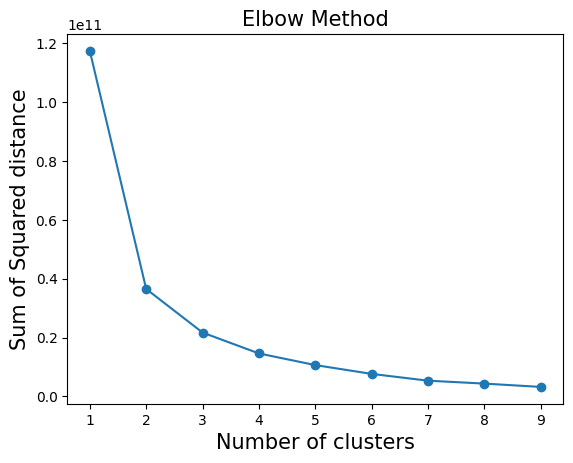

In [ ]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)

plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=111)

In [ ]:
pd.Series(kmeans.labels_).value_counts()


2    84
0    47
1    36
dtype: int64

In [ ]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

**Prediction**

In [ ]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [ ]:
#save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

In [ ]:
cluster_labels = kmeans.fit_predict(scaled_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualization of clusters**


In [ ]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

In [ ]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df)
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

From above two clusters graph we can conclude that

Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country
Country having low child-mortality, high gdpp and high infaltion is the developed country
So here we conclude that
0 = under-developing country
1 = developing country
2 = developed country



In [ ]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 47
Number of developing countries 36
Number of under-developing countries 84


In [ ]:
#list of developed countries
list(developed)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [ ]:
#list of developing countries
list(developing)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [ ]:
for i in developed:
    if i == 'India':
        print('Yes', i , 'is present in developed countries list')

Yes India is present in developed countries list


In [ ]:
#list of under-developing countries
list(under_developing)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

Hierarchical Clustering


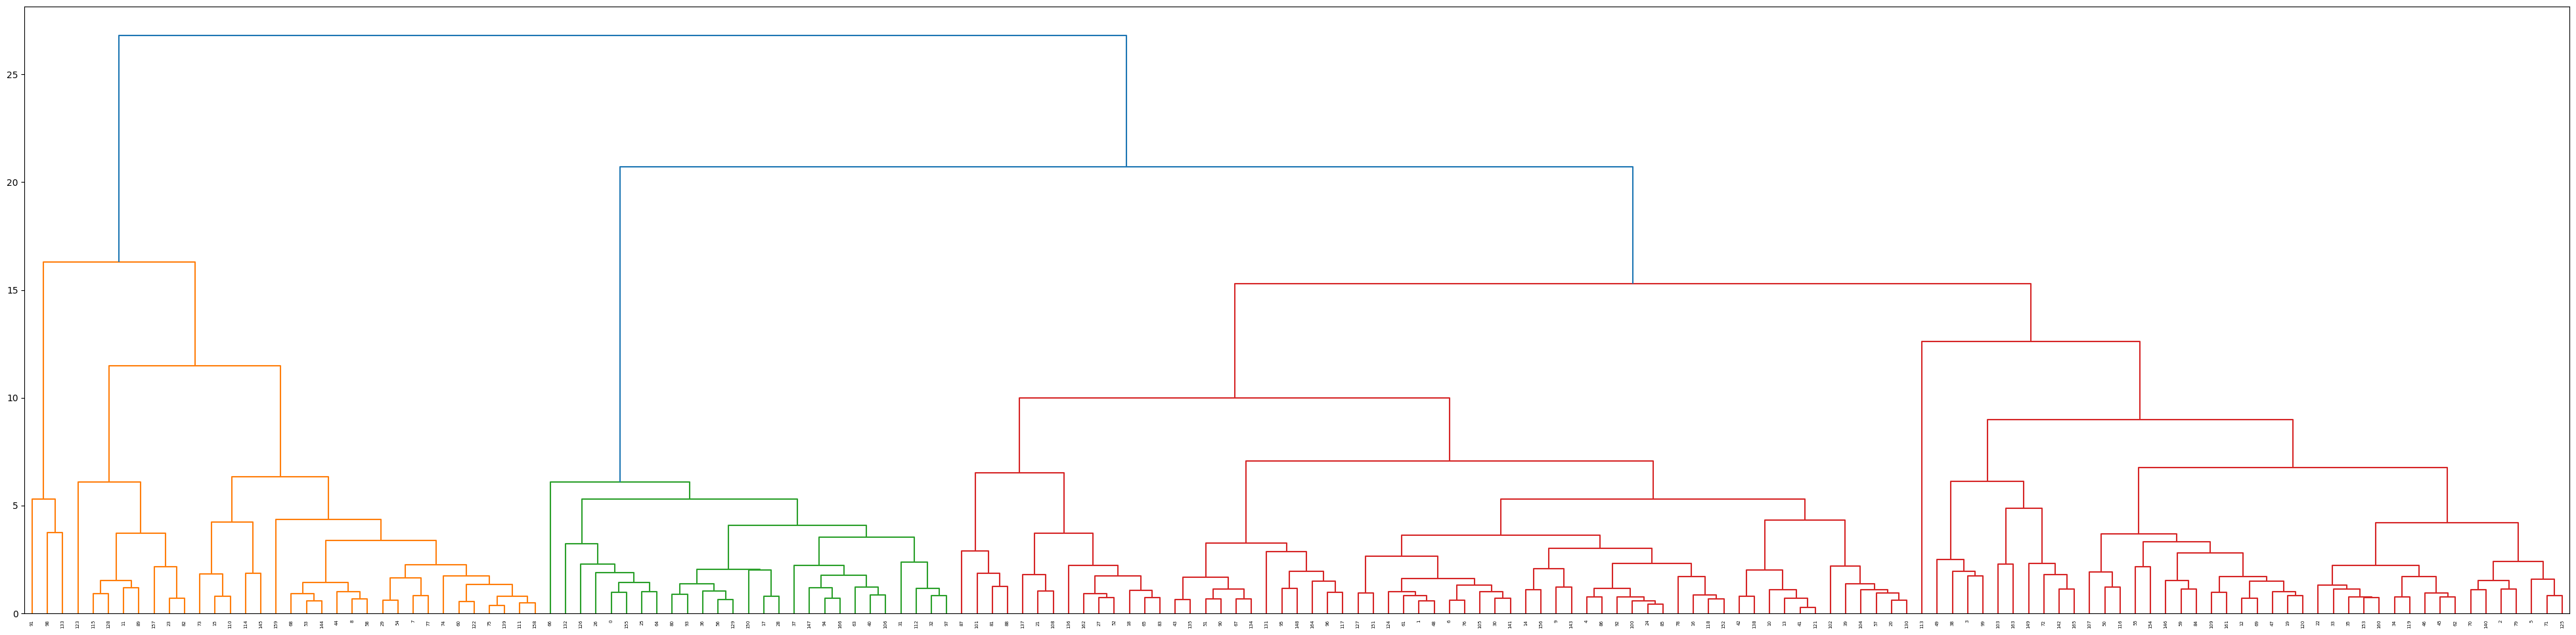

In [ ]:
#plotting dendogram
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))


In [ ]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1


Visualization hcluster


In [ ]:
#visulazing hcluster results
#child mortality vs exports
sns.scatterplot(hcluster_df['child_mort'],hcluster_df['gdpp'],hue='hcluster',data=hcluster_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()


TypeError: scatterplot() got multiple values for argument 'data'

In [ ]:
#visulazing hcluster results
#visulization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters')
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
#find number of developed country,developing country,under-developed country
developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==1]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))


Number of deveoped countries 34
Number of developing countries 106
Number of under-developing countries 27
